In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Algorithm:

$$ x^{k+1}\ =\ x^{k}\ -\ \frac{df(x^k)}{dx},\ k\ =\ 1,\ 2,\ 3,\ ...$$ 

In [22]:
ax = np.arange(-4, 4, 0.25)
ay = np.arange(-4, 4, 0.25)
ax, ay = np.meshgrid(ax, ay)

In [3]:
def z(x, y):
    return x ** 2 + y ** 2 + 4 * np.sin(x*y)

In [4]:
def dz_dx(x, y):
    return 2 * x + 4 * y * np.cos(x * y)

In [5]:
def dz_dy(x, y):
    return 2 * y + 4 * x * np.cos(x * y)

Define function to optimize:

In [19]:
def optimize(x, y, z, n=70, lr=0.01):
    """
    :param x: (float) x start coord
    :param y: (float) y start coord
    :param z: (function); optimizing function
    :param n: (int) optional; number of iterations
    :param lr: (float) optional; learning rate, "step" of algorithm
    :return: hist: (list(list)) of floats; x, y, z(x, y) history
    """
    hist = []
    for _ in range(n):
        # coordinates must be updated at the same time
        tmp0 = x - lr * dz_dx(x, y)
        tmp1 = y - lr * dz_dy(x, y)
        x = tmp0
        y = tmp1
        hist.append([x, y, z(x, y)])
    return hist

In [23]:
grad_hist = np.array(optimize(1, -4, z))
grad_hist2 = np.array(optimize(2.5, 3, z))

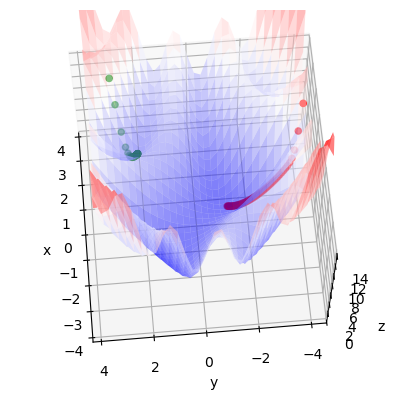

In [24]:
fig = plt.figure()
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')
ax_3d.set_zlim(0, 14)
ax_3d.set_xlim(-4, 4)
ax_3d.plot_surface(ax, ay, z(ax, ay), alpha=0.5, cmap='bwr')
ax_3d.view_init(65, 175)
ax_3d.scatter(grad_hist[:, 0], grad_hist[:, 1], grad_hist[:, 2], color='r')
ax_3d.scatter(grad_hist2[:, 0], grad_hist2[:, 1], grad_hist2[:, 2], color='g')

In the second case we went to the local minimum!